# Project 2 - Ames Housing Data and Kaggle Challenge

## 01 EDA Cleaning and Feature Engineering

Project2 - Ames Housing Data and Kaggle Challenge which use a data provided to create a regression model that predicts the price of houses in Ames, Iowa

##### The problem statement is  
As a real estate agency based in Ames, in order to help the client (house owner) to estimate their house price decied features to do with their house to increase value of the house:  
'If you want to sell your own house, which features could increase the values of your house and which features could drop the values of your house'

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

## Import and clean data

In [2]:
# import data
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
train_ori = train.copy()
test_ori = test.copy()

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.shape

(2051, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# change columns to lowercase and remove spaces
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [8]:
train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

In [9]:
# drop id and pid that will not be use as a features
train = train.drop('id',axis=1)
train = train.drop('pid',axis=1)

In [10]:
categorical = train.dtypes[train.dtypes == 'object'].index.tolist()
numerical = train.dtypes[train.dtypes != 'object'].index.tolist()

In [11]:
train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
mssubclass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.00,190.0
lotfrontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lotarea,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overallqual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overallcond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
yearbuilt,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
yearremod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
masvnrarea,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfinsf1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfinsf2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0


In [12]:
train[categorical].describe().T

,count,unique,top,freq
mszoning,2051,7,RL,1598
street,2051,2,Pave,2044
alley,140,2,Grvl,85
lotshape,2051,4,Reg,1295
landcontour,2051,4,Lvl,1843
utilities,2051,3,AllPub,2049
lotconfig,2051,5,Inside,1503
landslope,2051,3,Gtl,1953
neighborhood,2051,28,NAmes,310
condition1,2051,9,Norm,1767


In [13]:
print(train.shape)
print(test.shape)

(2051, 79)
(879, 80)


In [14]:
set(train.columns).difference(set(test.columns))

{'saleprice'}

### Check null values

In [15]:
train.isnull().sum().sort_values(ascending=False)[0:25]

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
lotfrontage      330
garagequal       114
garagecond       114
garageyrblt      114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtqual          55
bsmtfintype1      55
bsmtcond          55
masvnrtype        22
masvnrarea        22
bsmthalfbath       2
bsmtfullbath       2
bsmtunfsf          1
totalbsmtsf        1
bsmtfinsf1         1
bsmtfinsf2         1
garagecars         1
dtype: int64

There is to total of 26 null columns in this data set.  

So we decied to 
impute the null value by looking in to each one and decided what to do as following:
<ul>
    <li>Missing value that maybe typo:</li>
        <ol>
        <li>lotfrontage: Linear feet of street connected to property which will fill in by mean</li>
        <li>masvnrtype: Masonry veneer type which will fill in by mean</li>
        <li>masvnrarea: Masonry veneer area in square feet which will fill in by mean</li>
        </ol>
        <br>
    <li>Missing value that the house may not actually have that fuction:</li>
        <ol>
        <li>poolqc: house may not have pool</li>
        <li>alley: house may not have alley access</li>
        <li>fence: house may not have fence</li>
        <li>miscfeature: house may not have <li>miscfeature</li></li>
        <li>fireplacequ: house may not have fire place</li>
        <li>garagefinish: house may not have garage</li>
        <li>garageyrblt: house may not have garage</li>
        <li>garagecond: house may not have garage</li>
        <li>garagequal: house may not have garage</li>
        <li>garagetype: house may not have garage</li>
        <li>bsmtexposure: house may not have basement</li>
        <li>bsmtfintype2 : house may not have basement</li>
        <li>bsmtqual: house may not have basement</li>
        <li>bsmtcond: house may not have basement</li>
        <li>bsmtfintype1: house may not have basement</li>
        <li>bsmtfullbath: house may not have basement</li>
        <li>bsmthalfbath: house may not have basement</li>
        <li>garagecars: house may not have garage</li> 
        <li>totalbsmtsf: house may not have basement</li>
        <li>bsmtunfsf: house may not have basement</li>
        <li>bsmtfinsf2: house may not have basement</li>
        <li>bsmtfinsf1: house may not have basement</li>
        <li>bsmtfintype1: house may not have basement</li>
        <li>bsmtfullbath: house may not have basement</li>
        <li>bsmthalfbath: house may not have basement</li>
        <li>garagearea: house may not have garage</li>
        </ol>
        <br>
    </ul>
    


##### Impute null value with typo

In [16]:
#------------------Fill in Null value with typo ------------------#

#lotfrontage fill 330 null value in with mean
lotfrontage_values = {'lotfrontage':69.055200}
train.fillna(value=lotfrontage_values, inplace=True)
test.fillna(value=lotfrontage_values, inplace=True)

# masvnrarea fill 22 null value in with 0
masvnrarea_values = {'masvnrarea':0}
train.fillna(value=masvnrarea_values, inplace=True)
test.fillna(value=masvnrarea_values, inplace=True)

# masvnrtype fill 22 null value in NA to encode further
masvnrtype_values = {'masvnrtype':'NA'}
train.fillna(value=masvnrtype_values, inplace=True)
test.fillna(value=masvnrtype_values, inplace=True)

In [17]:
train.isnull().sum().sort_values(ascending=False)[0:22]

poolqc          2042
miscfeature     1986
alley           1911
fence           1651
fireplacequ     1000
garagecond       114
garagequal       114
garageyrblt      114
garagefinish     114
garagetype       113
bsmtexposure      58
bsmtfintype2      56
bsmtqual          55
bsmtcond          55
bsmtfintype1      55
bsmtfullbath       2
bsmthalfbath       2
bsmtunfsf          1
garagearea         1
garagecars         1
bsmtfinsf2         1
bsmtfinsf1         1
dtype: int64

In [18]:
null_col = train.columns[train.isna().any()].tolist()

In [19]:
def fill_NA_train_test(x):
    if train[x].dtypes == 'O':
        train[x].fillna('NA',inplace=True)
        test[x].fillna('NA',inplace=True)
    else:
        train[x].fillna(0,inplace=True)
        test[x].fillna(0,inplace=True)  

In [20]:
#------------------Fill in Null value with house not have that fuction ------------------#

[fill_NA_train_test(col) for col in null_col]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

##### All Null value have filled

In [21]:
train.isnull().sum().sort_values(ascending=False)[0:5]

saleprice      0
foundation     0
roofmatl       0
exterior1st    0
exterior2nd    0
dtype: int64

In [22]:
print(train.shape)
print(test.shape)

(2051, 79)
(879, 80)


In [23]:
set(train.columns).difference(set(test.columns))

{'saleprice'}

#### Export clean data

In [24]:
train.to_csv('../datasets/train_clean.csv', index = False)
test.to_csv('../datasets/test_clean.csv', index = False)

## Exploratory Data Analysis

In [25]:
train2 = train.copy()
test2 = test.copy()

In [26]:
train2.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [27]:
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
mssubclass,2051.0,57.008776,42.824223,20.0,20.0,50.0000,70.0,190.0
lotfrontage,2051.0,69.055200,21.306357,21.0,60.0,69.0552,78.0,313.0
lotarea,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0000,11513.5,159000.0
overallqual,2051.0,6.112140,1.426271,1.0,5.0,6.0000,7.0,10.0
overallcond,2051.0,5.562165,1.104497,1.0,5.0,5.0000,6.0,9.0
yearbuilt,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0000,2001.0,2010.0
yearremod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0000,2004.0,2010.0
masvnrarea,2051.0,98.626524,174.324690,0.0,0.0,0.0000,159.0,1600.0
bsmtfinsf1,2051.0,442.084837,461.195041,0.0,0.0,368.0000,733.5,5644.0
bsmtfinsf2,2051.0,47.935641,164.964052,0.0,0.0,0.0000,0.0,1474.0


Text(0.5, 1.0, 'Distribution of sale price')

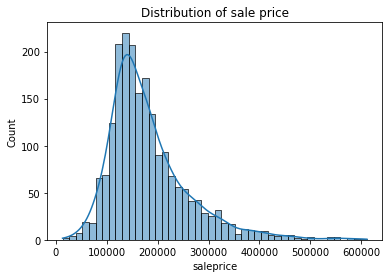

In [28]:
# sale price distribution
sns.histplot(train2['saleprice'].dropna(),kde=True)
plt.title('Distribution of sale price')

Text(0.5, 1.0, 'Distribution of house overall quality')

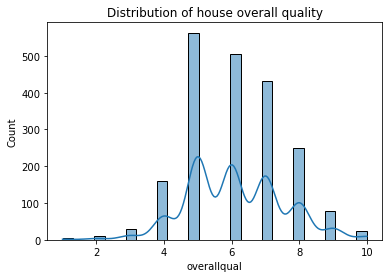

In [29]:
# overall quality distribution
sns.histplot(train2['overallqual'].dropna(),kde=True)
plt.title('Distribution of house overall quality')

Text(0.5, 1.0, 'Distribution of house grliving')

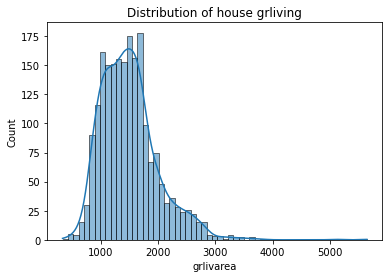

In [30]:
# grliving area distribution
sns.histplot(train2['grlivarea'].dropna(),kde=True)
plt.title('Distribution of house grliving')

###### Correlation between numerical features and sale price

In [31]:
train2.corr()['saleprice'].abs().sort_values(ascending = False)

saleprice        1.000000
overallqual      0.800207
grlivarea        0.697038
garagearea       0.649897
garagecars       0.647781
totalbsmtsf      0.629303
1stflrsf         0.618486
yearbuilt        0.571849
yearremod/add    0.550370
fullbath         0.537969
totrmsabvgrd     0.504014
masvnrarea       0.503579
fireplaces       0.471093
bsmtfinsf1       0.423856
openporchsf      0.333476
wooddecksf       0.326490
lotfrontage      0.325850
lotarea          0.296566
bsmtfullbath     0.283332
halfbath         0.283001
garageyrblt      0.258645
2ndflrsf         0.248452
bsmtunfsf        0.190861
bedroomabvgr     0.137067
enclosedporch    0.135656
screenporch      0.134581
kitchenabvgr     0.125444
overallcond      0.097019
mssubclass       0.087335
3ssnporch        0.048732
bsmthalfbath     0.045290
lowqualfinsf     0.041594
mosold           0.032735
poolarea         0.023106
bsmtfinsf2       0.016432
yrsold           0.015203
miscval          0.007375
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Correlation heatmap of house sale price')

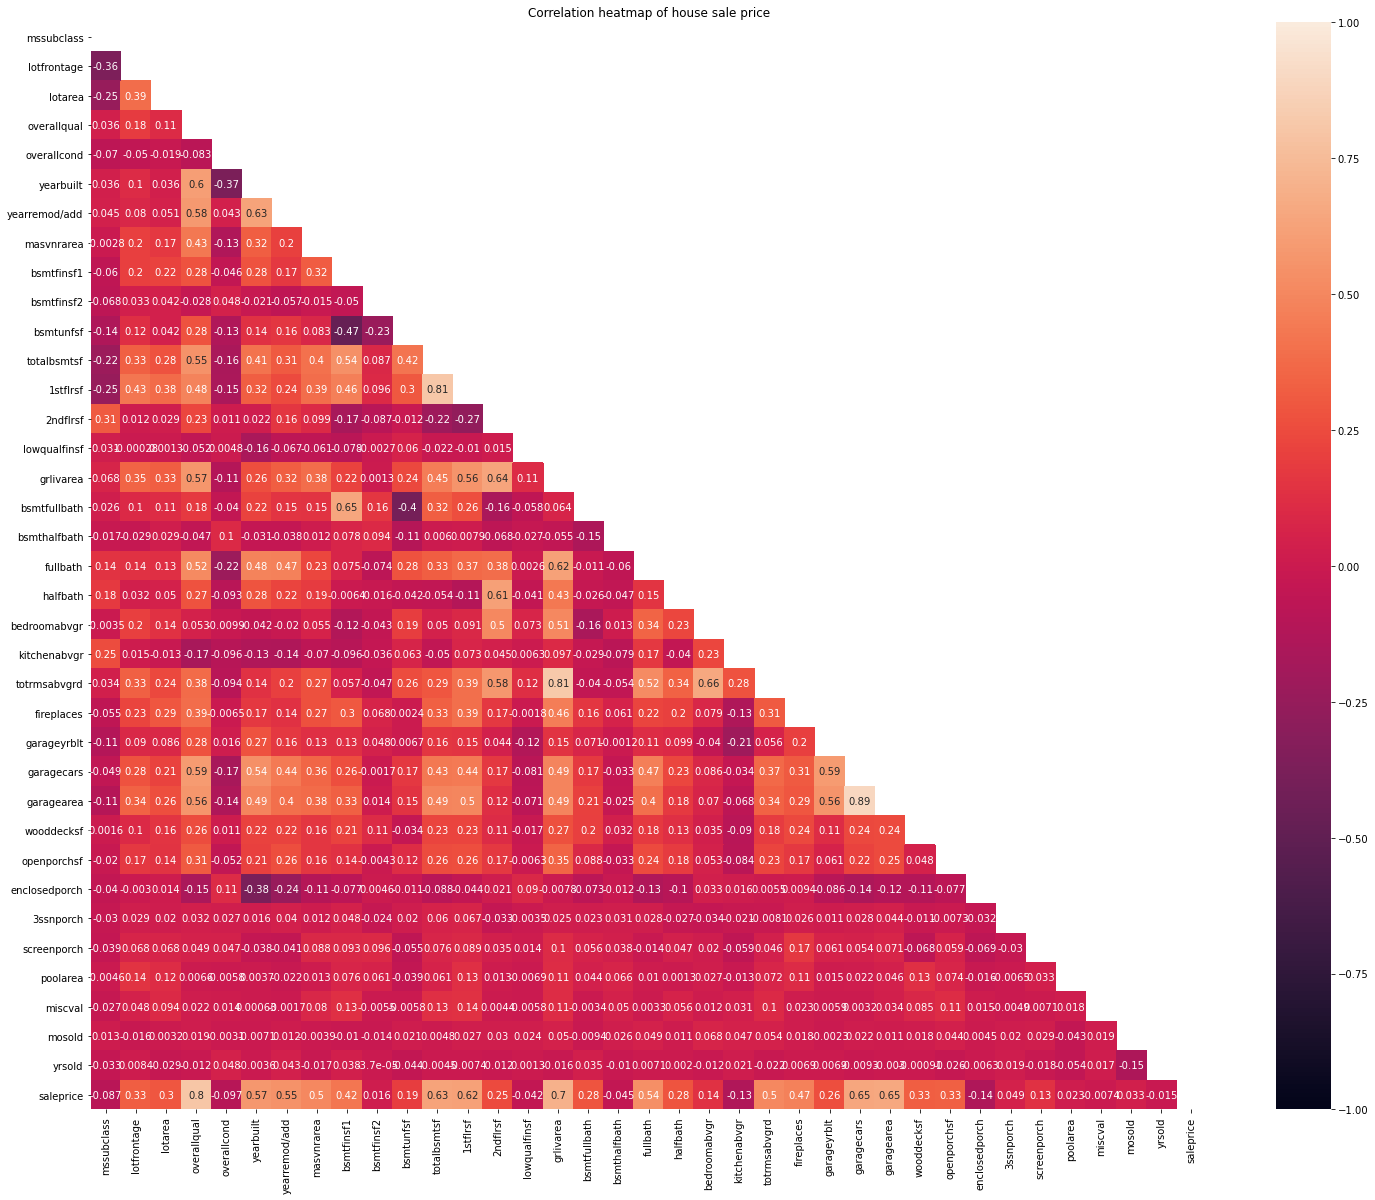

In [32]:
fig, ax = plt.subplots(figsize=(25,20))
mask = np.zeros_like(train2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train2.corr(),mask=mask, annot=True, vmin=-1, vmax=1)
ax.set_title('Correlation heatmap of house sale price')

##### Scatter plot to see a relationship of sale price and numeric features

In [33]:
def scatter_plot(x):
    sns.regplot(x=x,y='saleprice',data=train2)
    plt.title('Scatter plot showing relation between sale price and '+x)
    plt.show()

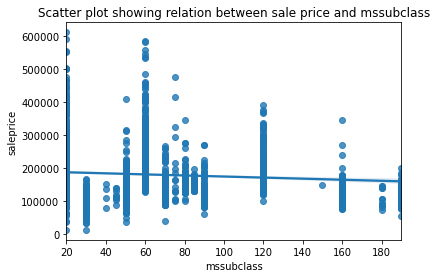

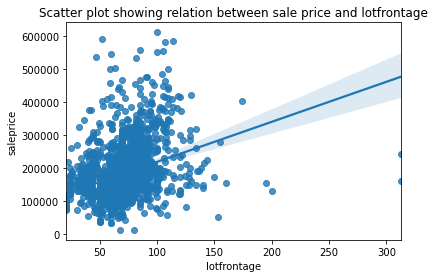

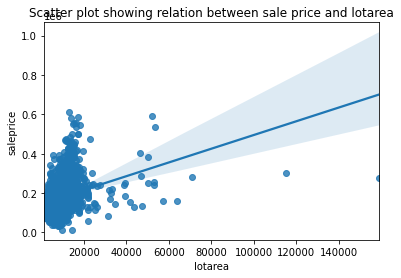

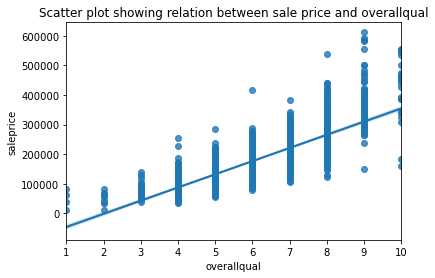

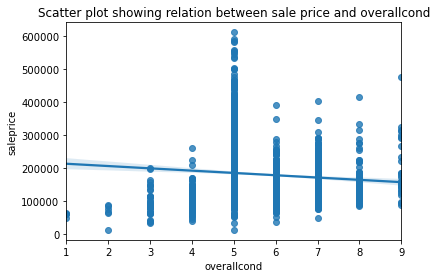

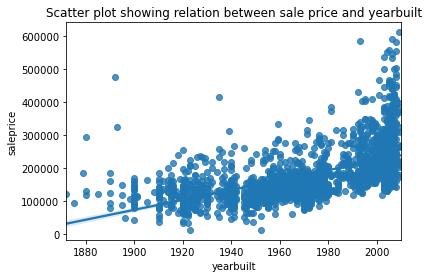

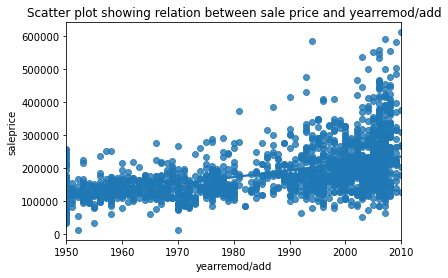

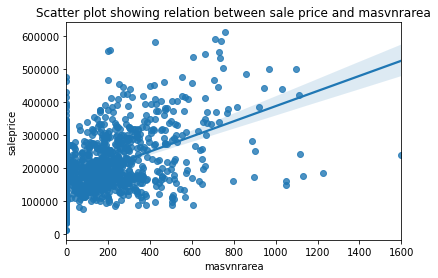

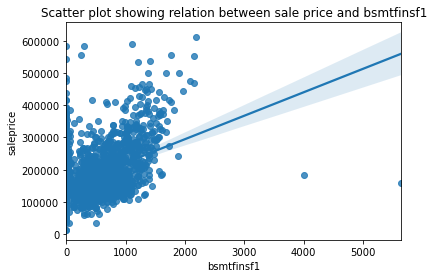

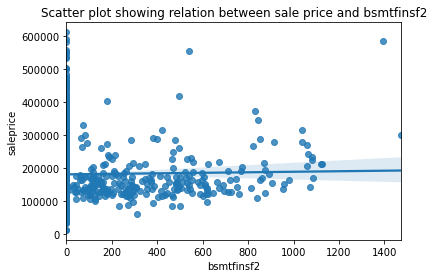

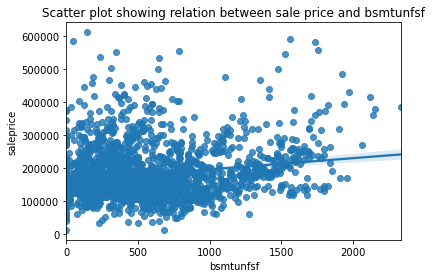

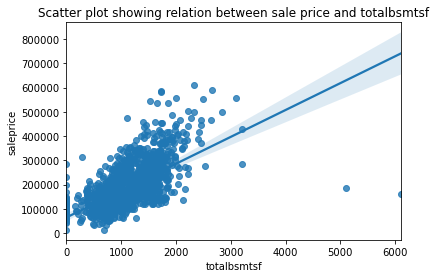

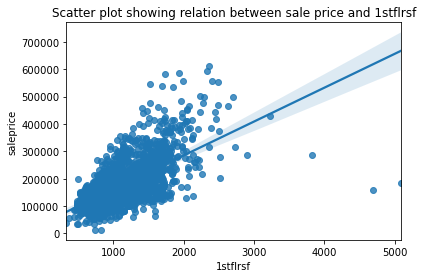

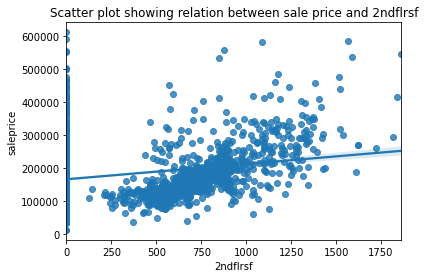

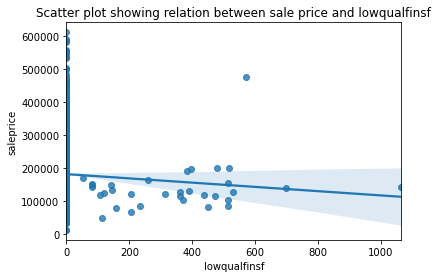

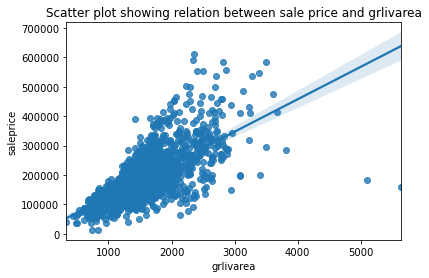

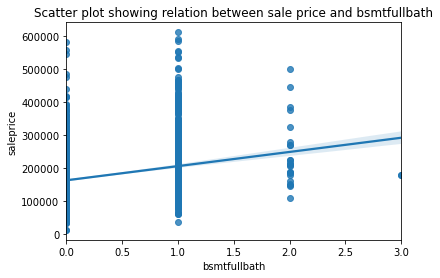

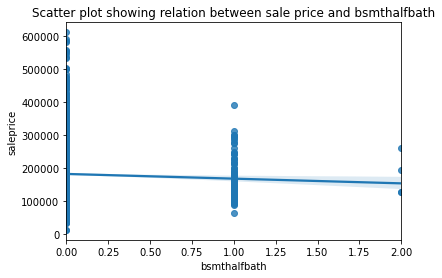

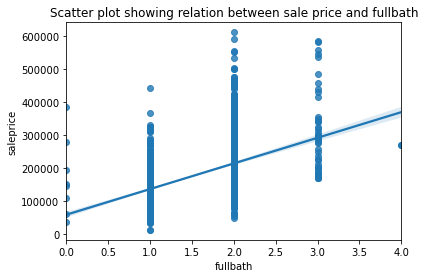

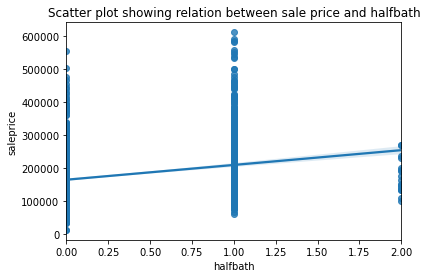

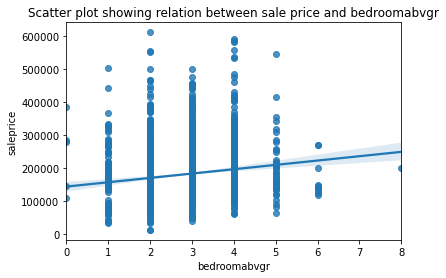

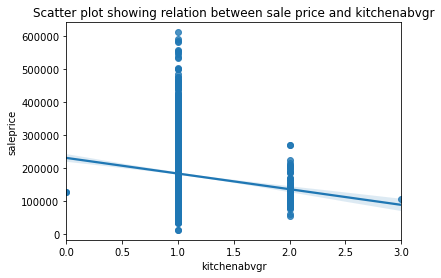

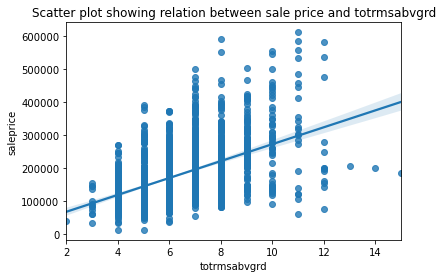

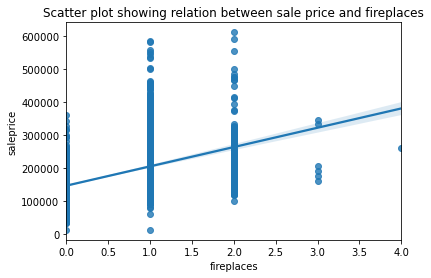

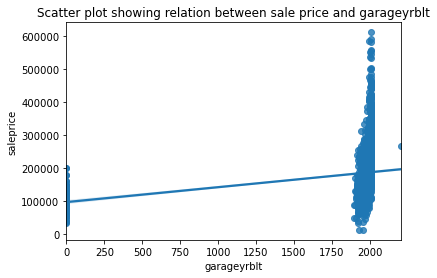

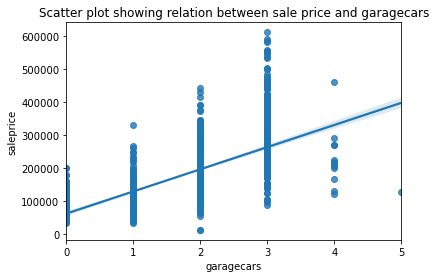

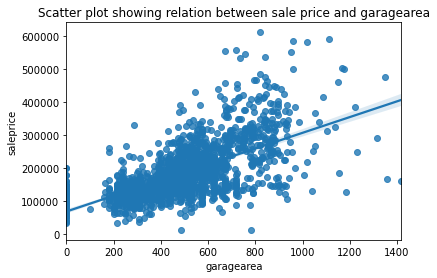

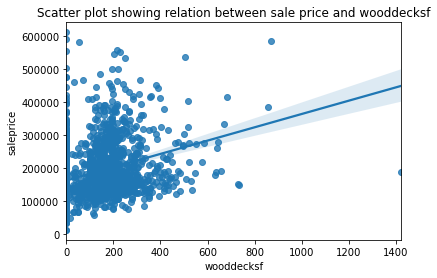

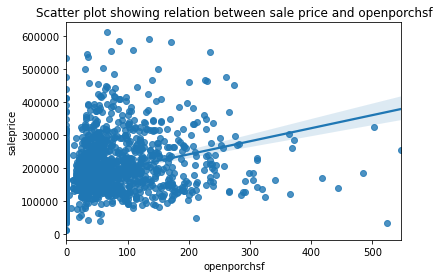

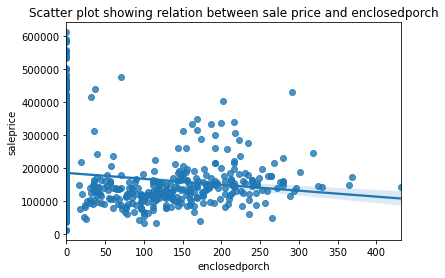

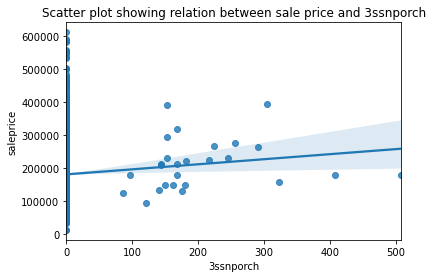

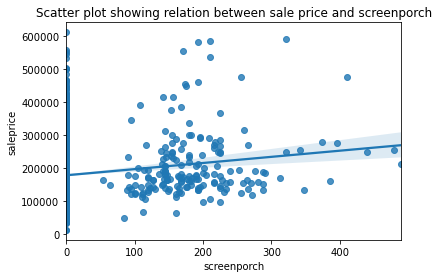

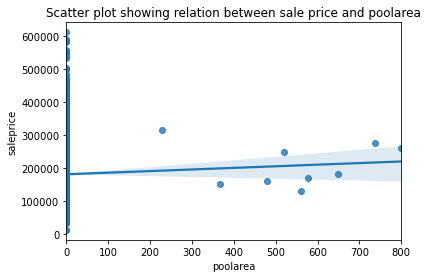

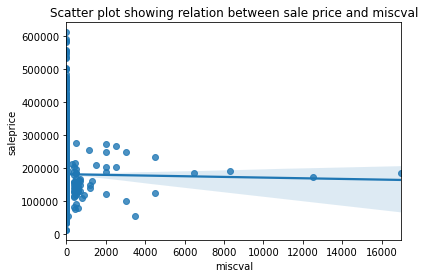

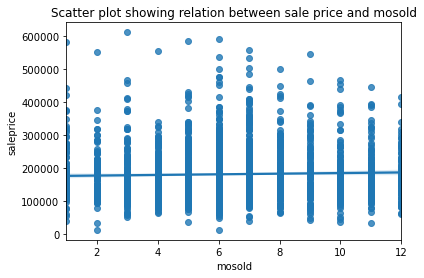

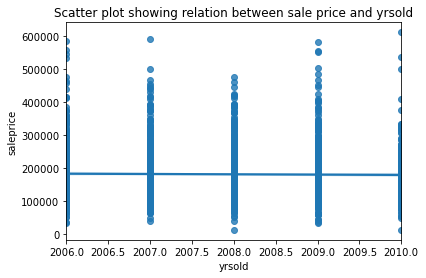

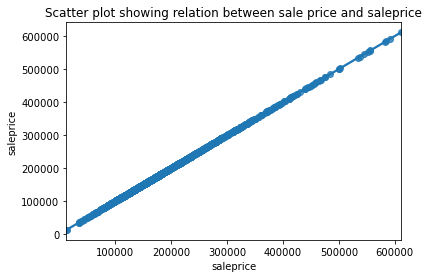

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
[scatter_plot(col) for col in (train.columns[train.dtypes != 'O'].tolist())]

##### Box plot to see a relationship of sale price and non numeric features

In [35]:
def box_plot(x):
    train.boxplot(column=['saleprice'], by=[x], figsize=(8,5))
    plt.suptitle('sale price by '+x)
    plt.title('')
    plt.ylabel('saleprice')
    plt.xlabel(x)
    plt.xticks(rotation = 90)
    plt.show()

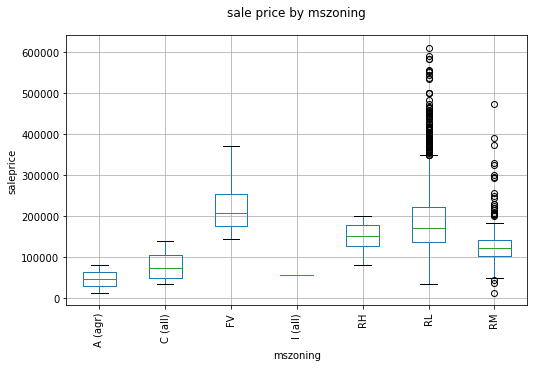

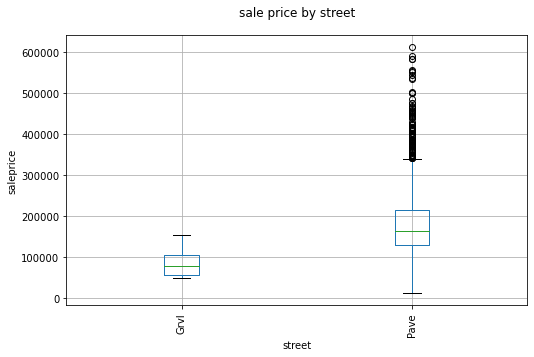

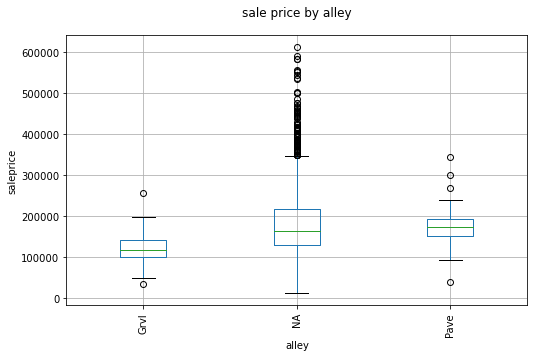

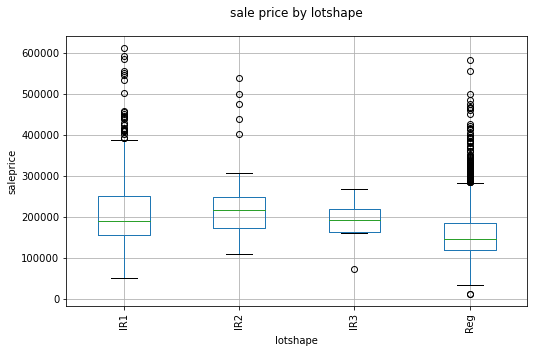

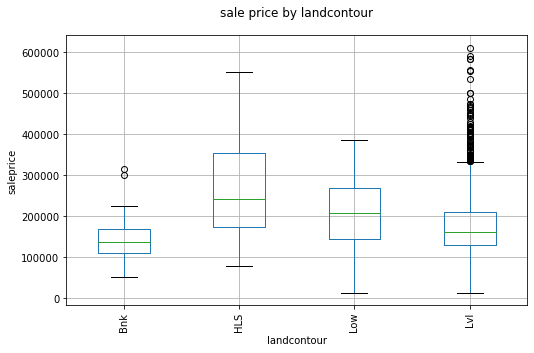

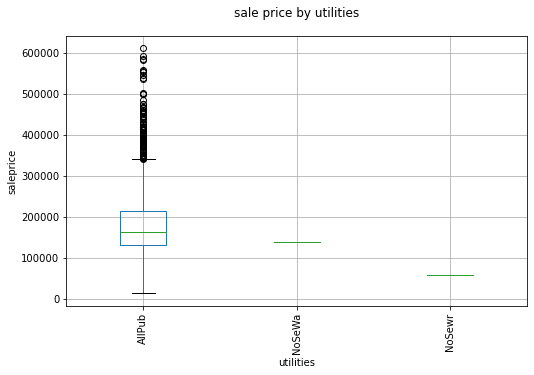

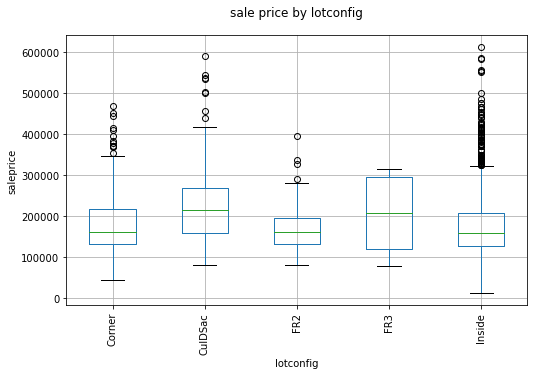

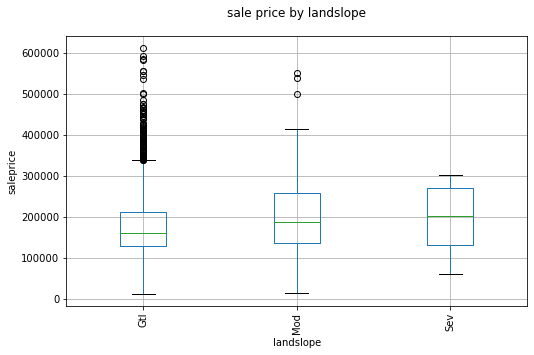

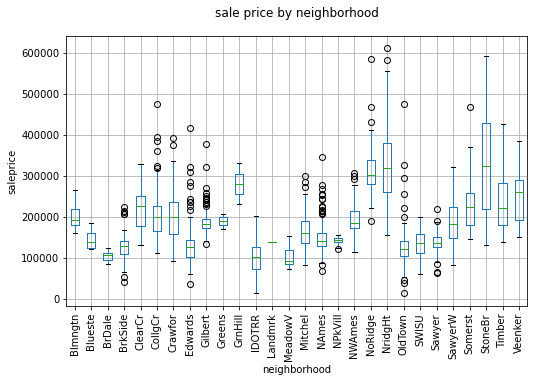

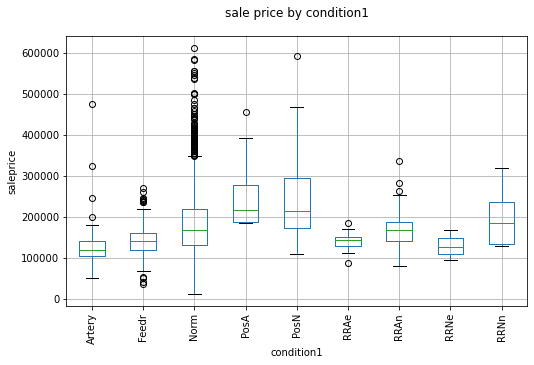

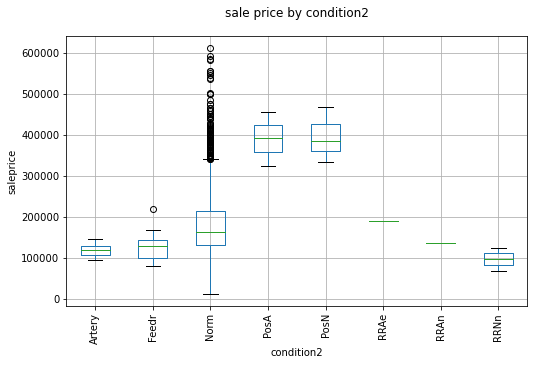

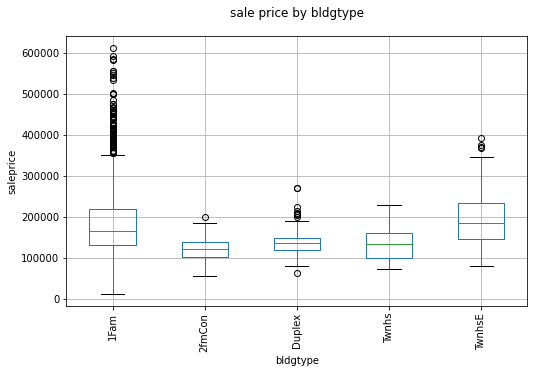

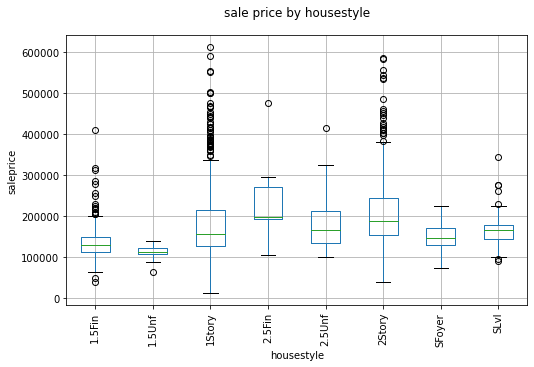

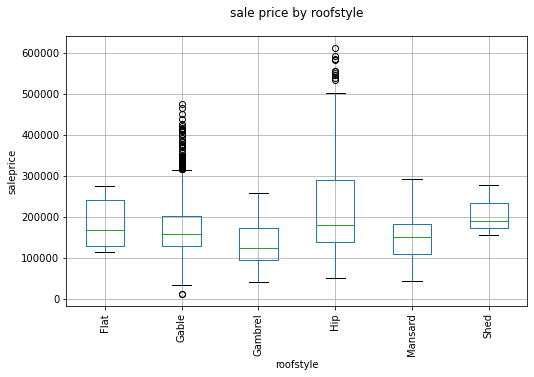

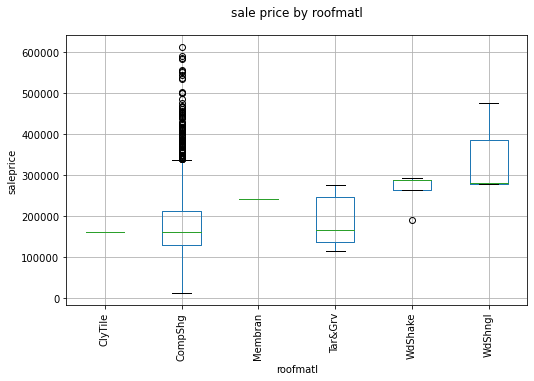

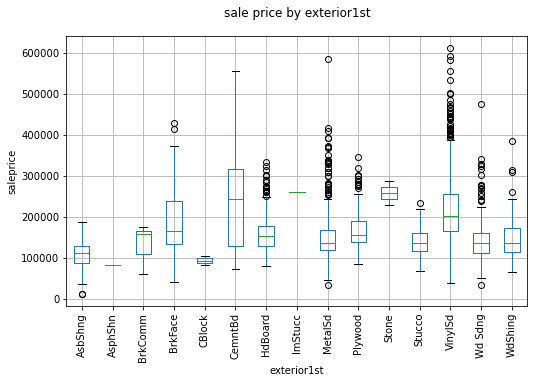

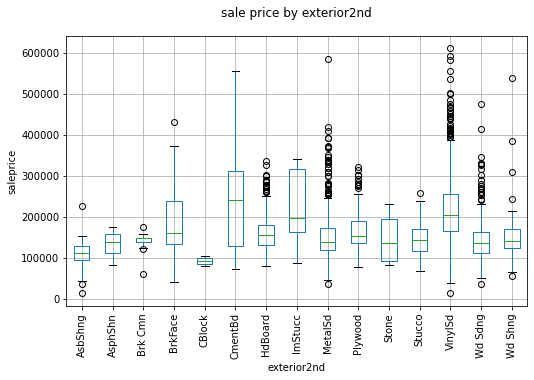

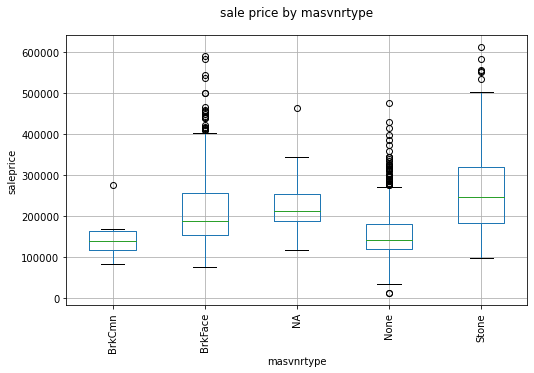

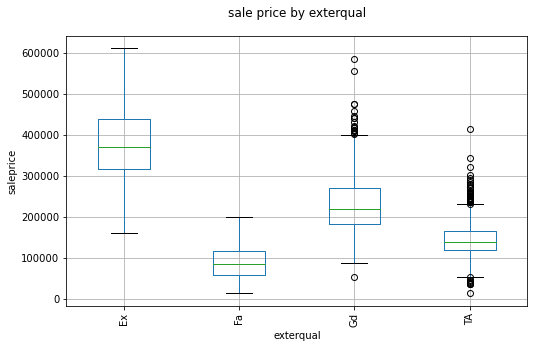

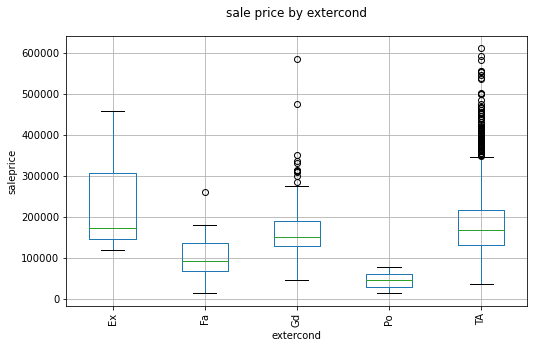

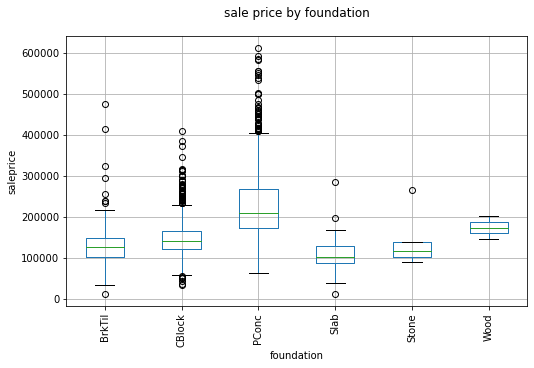

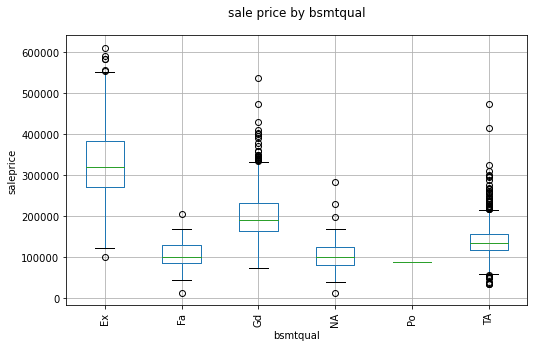

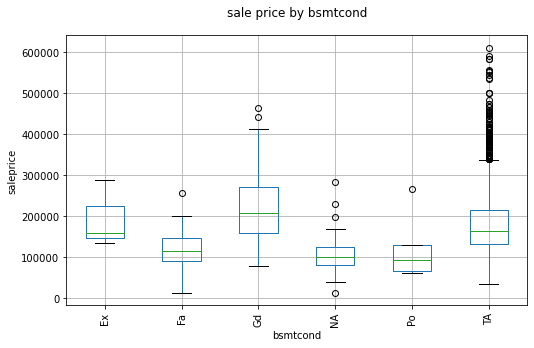

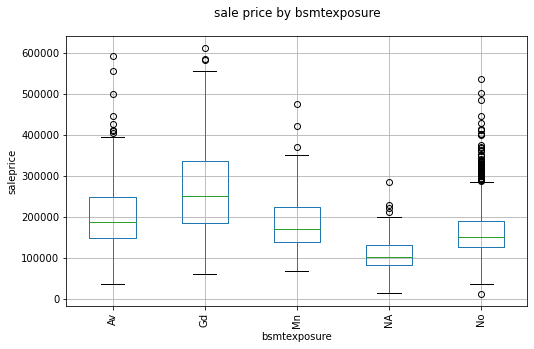

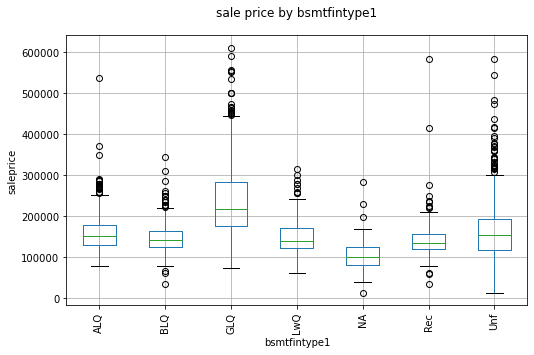

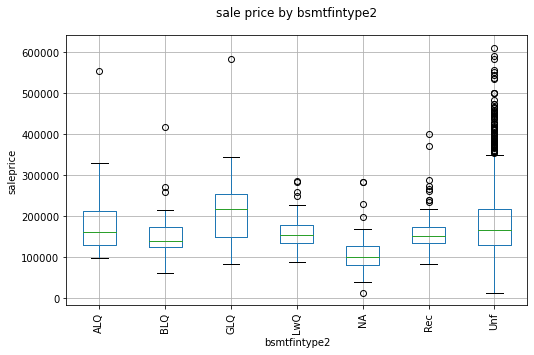

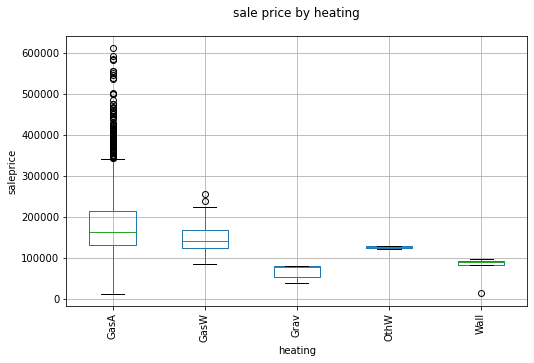

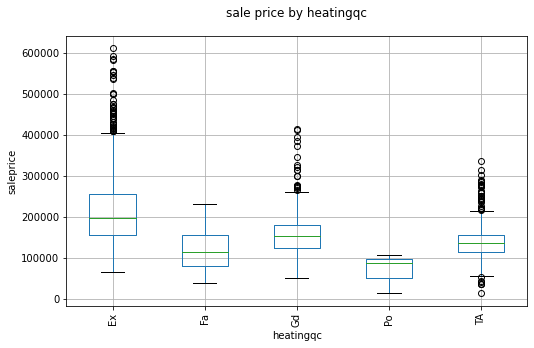

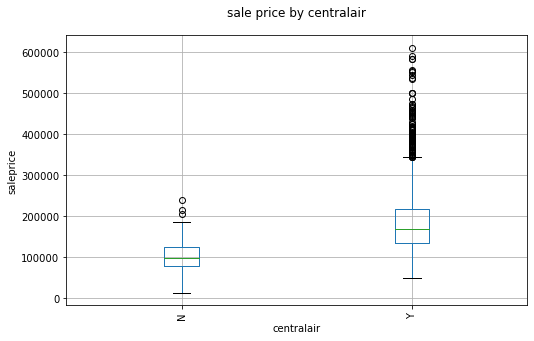

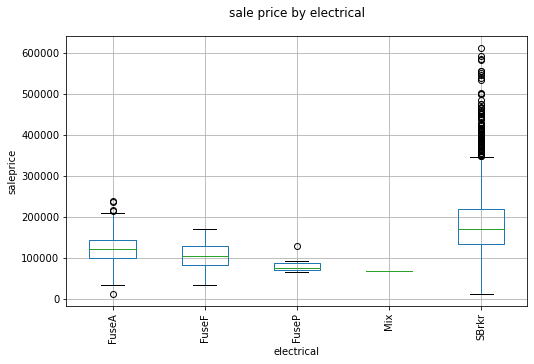

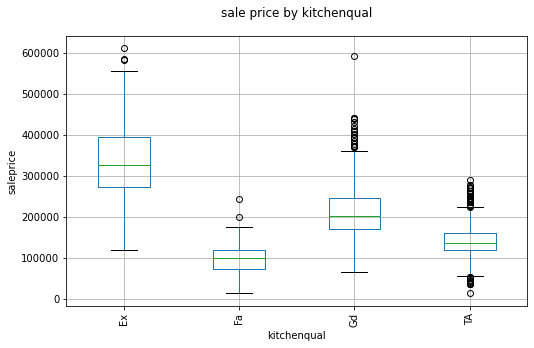

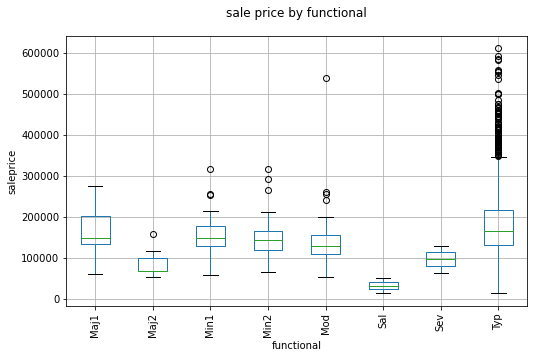

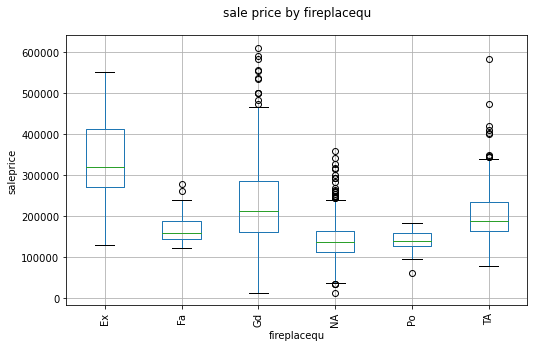

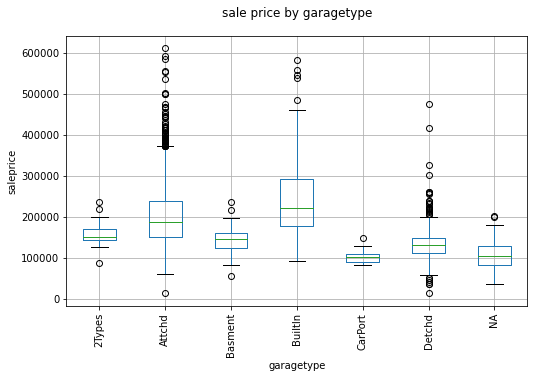

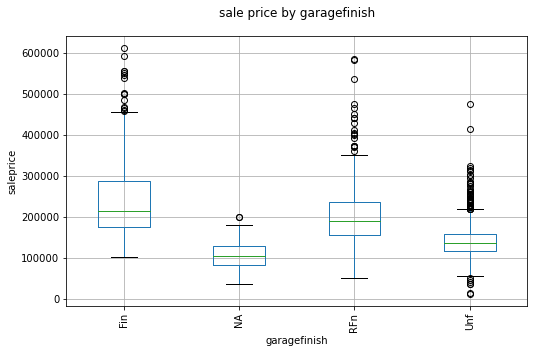

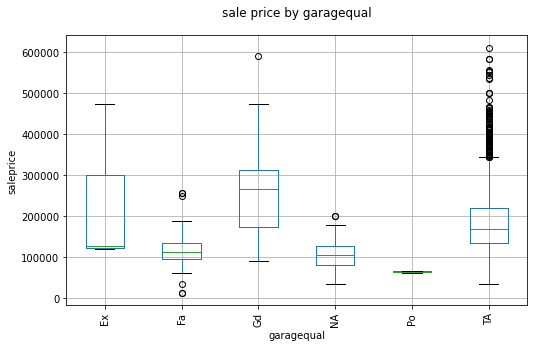

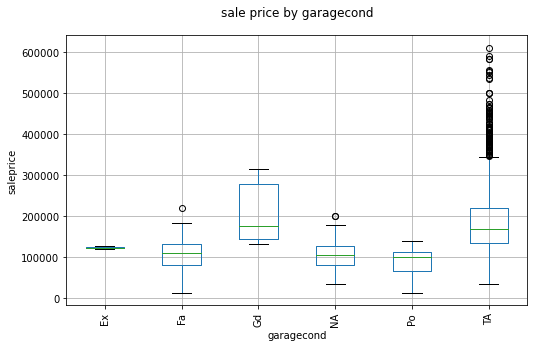

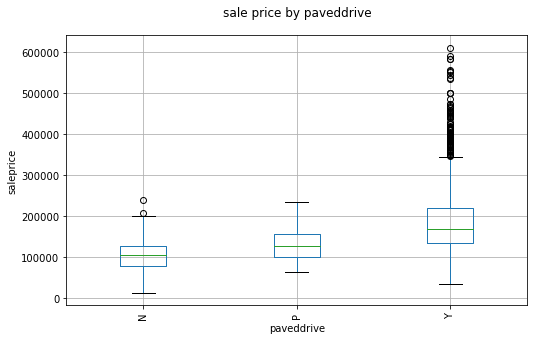

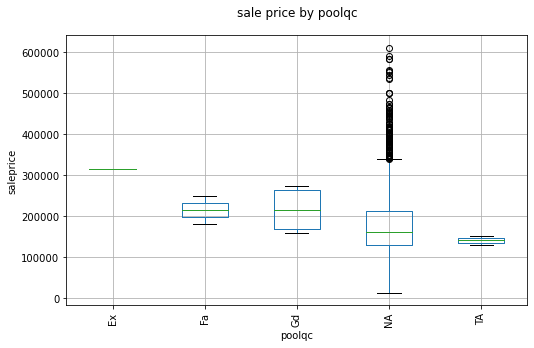

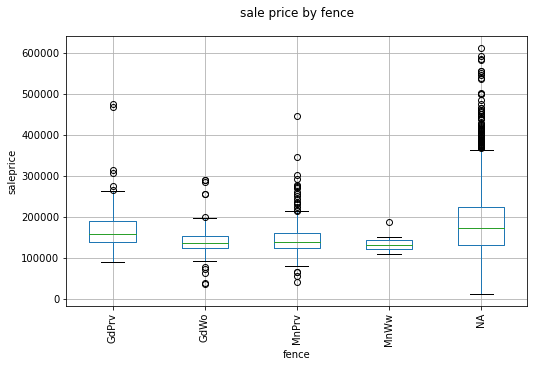

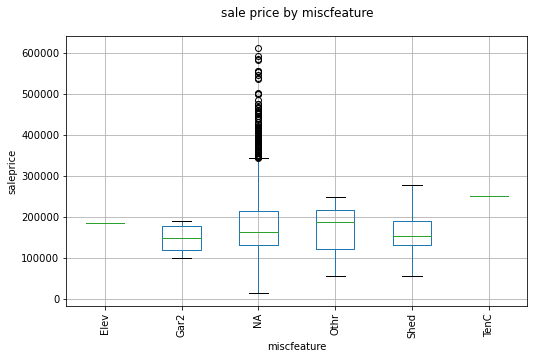

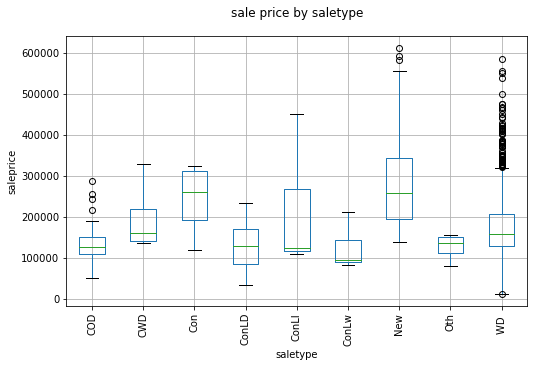

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [36]:
[box_plot(col) for col in (train.columns[train.dtypes == 'O'].tolist())]

## Pre-processing

### Encode categorical data

In [37]:
def to_ordinal_train_test2(x,order):
    enc = OrdinalEncoder(categories=[order])
    enc.fit(train2[[x]])
    enc.fit(test2[[x]])
    train2[[x]] = enc.transform(train2[[x]])
    test2[[x]] = enc.transform(test2[[x]])

In [38]:
def encode_getdummy_train_test2(f):
    global train2
    global test2
    
    # as there are more unique value in test data so create CategoricalDtype to have same no of columns
    u_cat = np.unique((test2[f].unique().tolist())+(train2[f].unique().tolist())).tolist()
    
    #set categories for equal columns
    train2[f] = train2[f].astype(CategoricalDtype(u_cat))
    test2[f] = test2[f].astype(CategoricalDtype(u_cat))
    
    # use .get_dummies() to encode data
    train2 = pd.concat([train2,pd.get_dummies(train2[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)
    test2 = pd.concat([test2,pd.get_dummies(test2[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)

In [39]:
train2.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [40]:
#-----------------------------------------Ordinal-----------------------------------------#

order = ['NA','Po','Fa','TA','Gd','Ex']
order_alley = ['NA','Grvl','Pave']
order_fence = ['NA','Minimum','Good']
order_garagefinish = ['NA','Unf','RFn','Fin']
order_bsmtexposure = ['NA','No','Mn','Av','Gd']
order_bsmtfintype = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
order_street = ['NA','Grvl','Pave']
order_lotshape = ['NA','IR3','IR2','IR1','Reg']
order_utilities = ['NA','ELO','NoSeWa','NoSewr','AllPub']
order_landslope = ['NA','Sev','Mod','Gtl']
order_yn = ['N','Y']
order_functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
order_paveddrive = ['N','P','Y']

#pool qc
to_ordinal_train_test2('poolqc',order)

# alley
to_ordinal_train_test2('alley',order_alley)

# fence
train2['fence'] = train2['fence'].replace(['MnPrv'],'Minimum')
train2['fence'] = train2['fence'].replace(['GdPrv'],'Good')
train2['fence'] = train2['fence'].replace(['MnWw'],'Minimum')
train2['fence'] = train2['fence'].replace(['GdWo'],'Good')
test2['fence'] = test2['fence'].replace(['MnPrv'],'Minimum')
test2['fence'] = test2['fence'].replace(['GdPrv'],'Good')
test2['fence'] = test2['fence'].replace(['MnWw'],'Minimum')
test2['fence'] = test2['fence'].replace(['GdWo'],'Good')
to_ordinal_train_test2('fence',order_fence)

# fire place quality
to_ordinal_train_test2('fireplacequ',order)

# garage finish
to_ordinal_train_test2('garagefinish',order_garagefinish)

# garage condition
to_ordinal_train_test2('garagecond',order)

# garage quality
to_ordinal_train_test2('garagequal',order)

# basement exposure
to_ordinal_train_test2('bsmtexposure',order_bsmtexposure)

# quality of basement second finished area
to_ordinal_train_test2('bsmtfintype2',order_bsmtfintype)

# quality of basement finished area
to_ordinal_train_test2('bsmtfintype1',order_bsmtfintype)

# basement general condition
to_ordinal_train_test2('bsmtcond',order)

# height of the basement
to_ordinal_train_test2('bsmtqual',order)

# street
to_ordinal_train_test2('street',order_street)

# heating quality and condition
to_ordinal_train_test2('heatingqc',order)

# external quality
to_ordinal_train_test2('exterqual',order)

# external condition
to_ordinal_train_test2('extercond',order)

# general shape of property
to_ordinal_train_test2('lotshape',order_lotshape)

# type of utilities available
to_ordinal_train_test2('utilities',order_utilities)

# land slope
to_ordinal_train_test2('landslope',order_landslope)

# central air
to_ordinal_train_test2('centralair',order_yn)

# kitchen quality
to_ordinal_train_test2('kitchenqual',order)

# Home functionality rating
to_ordinal_train_test2('functional',order_functional)

# Paved driveway
to_ordinal_train_test2('paveddrive',order_paveddrive)

In [41]:
#-----------------------------------------Get dummy-----------------------------------------#
# miscfeature
encode_getdummy_train_test2('miscfeature')

# mssubclass
encode_getdummy_train_test2('mssubclass')

# garage type
encode_getdummy_train_test2('garagetype')

# masonry veneer type
encode_getdummy_train_test2('masvnrtype')

# general zoning classification of the sale.
encode_getdummy_train_test2('mszoning')

# type of heating
encode_getdummy_train_test2('heating')

# flatness of property
encode_getdummy_train_test2('landcontour')

# lot configuration
encode_getdummy_train_test2('lotconfig')

# physical locations within Ames city limits
encode_getdummy_train_test2('neighborhood')

# proximity to main road or railroad
encode_getdummy_train_test2('condition1')

# Proximity to main road or railroad second
encode_getdummy_train_test2('condition2')

# type of dwelling
encode_getdummy_train_test2('bldgtype')

# style of dwelling
encode_getdummy_train_test2('housestyle')

# roof style
encode_getdummy_train_test2('roofstyle')

# roof materials
encode_getdummy_train_test2('roofmatl')

# Exterior covering on house
encode_getdummy_train_test2('exterior1st')

# Exterior covering on house (if more than one material)
encode_getdummy_train_test2('exterior2nd')

# Type of foundation
encode_getdummy_train_test2('foundation')

# type of electrical
encode_getdummy_train_test2('electrical')

# sale type
encode_getdummy_train_test2('saletype')

In [42]:
train2.head()

,lotfrontage,lotarea,street,alley,lotshape,utilities,landslope,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,centralair,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,saleprice,miscfeature_Elev,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_CBlock,masvnrtype_NA,masvnrtype_None,masvnrtype_Stone,mszoning_A (agr),mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_ClyTile,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_PreCast,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_PreCast,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,electrical_nan,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD
0,69.0552,13517,2.0,0.0,3.0,4.0,3.0,6,8,1976,2005,289.0,4.0,3.0,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5.0,1.0,725,754,0,1479,0.0,0.0,2,1,3,1,4.0,6,7.0,0,0.0,1976.0,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0

In [43]:
set(train2.columns).difference(set(test2.columns))

{'saleprice'}

In [44]:
train2.shape

(2051, 243)

In [45]:
test2.shape

(879, 244)

In [46]:
train2.to_csv('../datasets/train_encoded.csv', index = False)
test2.to_csv('../datasets/test_encoded.csv', index = False)

### Remove outliers

As can spotted in EDA scatter plot above, 'saleprice', 'grlivarea' and 'totalbsmtsf' have and outstanding outliers which needs to remove.  
In this we use 3 standard deviations from the mean to remove outliers.  
This result to 2.63% of data was removed from the sample.

In [47]:
train3 = train2.copy()
test3 = test2.copy()

In [48]:
train.shape

(2051, 79)

In [49]:
train3['grlivarea'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: grlivarea, dtype: float64

In [50]:
1499.330083+(3*500.447829)

3000.67357

In [51]:
1499.330083-(3*500.447829)

-2.013404000000037

In [52]:
train3 = train3[train3['grlivarea'] < 3000.67357]

In [53]:
train3['saleprice'].describe()

count      2034.000000
mean     179970.788594
std       76855.107374
min       12789.000000
25%      129500.000000
50%      161250.000000
75%      213000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [54]:
179970.788594+(3*76855.107374)

410536.11071599997

In [55]:
train3 = train3[train3['saleprice'] < 410536.11071599997]

In [56]:
train3['totalbsmtsf'].describe()

count    2001.000000
mean     1032.846577
std       402.128723
min         0.000000
25%       784.000000
50%       988.000000
75%      1284.000000
max      3206.000000
Name: totalbsmtsf, dtype: float64

In [57]:
1032.268000+(3*402.128723)

2238.654169

In [58]:
1032.268000-(3*402.128723)

-174.11816899999985

In [59]:
train3 = train3[train3['totalbsmtsf'] < 2238.654169]

In [60]:
train3['lotarea'].describe()

count      1997.000000
mean       9850.899349
std        6449.054280
min        1300.000000
25%        7441.000000
50%        9313.000000
75%       11275.000000
max      159000.000000
Name: lotarea, dtype: float64

In [61]:
9850.899349+(3*6449.054280)

29198.062189

In [62]:
9850.899349-(3*6449.054280)

-9496.263491000002

In [63]:
train3 = train3[train3['lotarea'] < 29198.062189]

In [64]:
train3.shape

(1977, 243)

In [65]:
1-(1977/2051)

0.03607996099463673

In [66]:
train3.to_csv('../datasets/train_ole.csv', index = False)
test3.to_csv('../datasets/test_ole.csv', index = False)